In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.impute import SimpleImputer

data_uni_2 = pd.read_csv("data_uni.csv")


data_uni_2.iloc[:, [24,25,29]]= data_uni_2.iloc[:, [24,25,29]].fillna(0)
column_miss= list(data_uni_2.columns[data_uni_2.isnull().any()])

# IMPUTER ===========================================================================

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data_uni_2[column_miss]= imputer.fit_transform(data_uni_2[column_miss])

data_uni_2= data_uni_2.drop(["Course","AWM year 1", "AWM year 2", "AWM year 3", "Overall AWM", "Progression", "Attendance"], axis = 1)

# FORMATING MANUALLY ================================================================

#ethinicty binarisation 
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("White", "0")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Asian", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Black/Black British African", "1")
data_uni_2.Ethnicity = data_uni_2.Ethnicity.str.replace("Other ethnic background", "1")

# Polar 4 Score Binarisation
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(5, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(4, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(3, 0)
data_uni_2.Polar_4_Score = data_uni_2.Polar_4_Score.replace(2, 1)

#splitting X and y ==================================================================
y = data_uni_2["desertion"]
X = data_uni_2.drop(["desertion"], axis = 1)


### Categorical and numeric features

In [4]:
X.columns

Index(['UCAS', '25 Above', 'Disability', 'Ethnicity', 'Gender', 'British',
       'English native Language', 'Parent He attendance', 'Polar_4_Score',
       'SLC', 'Care Leaver', 'Student Visa', 'Refugee',
       'London Permanent Residence', 'UCAS Points', 'English', 'Maths',
       'A Levels', 'Btec', 'Previous work', 'Bursary', 'First Sit',
       'Second Sit', 'Fails', 'No Submissions', 'Late Submission', 'Pass',
       'Re Takes'],
      dtype='object')

In [5]:
fe_num= ['UCAS Points', 'English', 'Maths', 'First Sit', 
         'Second Sit', 'Fails', 'No Submissions', 'Late Submission',
        'Pass']

In [6]:
fe_cat= ['UCAS', '25 Above', 'Disability', 'Ethnicity', 'Gender',
       'British', 'English native Language', 'Parent He attendance',
       'Polar_4_Score', 'SLC', 'Care Leaver', 'Student Visa', 'Refugee',
       'London Permanent Residence', 'A Levels', 'Btec', 'Previous work', 'Bursary', 'Re Takes']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [8]:
x_train

,UCAS,25 Above,Disability,Ethnicity,Gender,British,English native Language,Parent He attendance,Polar_4_Score,SLC,...,Btec,Previous work,Bursary,First Sit,Second Sit,Fails,No Submissions,Late Submission,Pass,Re Takes
359,yes,yes,no,0,Male,yes,yes,no,0.0,yes,...,yes,no,no,4,2.0,2,0,0,33.333333,no
196,yes,no,no,0,Female,yes,yes,no,0.0,yes,...,yes,yes,no,3,3.0,0,1,2,100.000000,no
635,yes,no,no,1,Male,yes,yes,no,1.0,yes,...,yes,yes,yes,6,0.0,0,0,1,100.000000,no
81,no,yes,no,0,Male,no,no,yes,0.0,yes,...,no,no,no,1,2.0,3,4,2,50.000000,yes
816,yes,no,no,0,Male,yes,yes,yes,0.0,yes,...,no,no,no,5,1.0,3,1,1,50.000000,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,yes,no,no,1,Male,no,yes,no,0.0,no,...,no,no,no,4,2.0,0,5,1,100.000000,yes
330,no,no,no,0,Male,yes,yes,no,0.0,yes,...,no,yes,no,2,4.0,5,4,0,83.333333,yes
466,yes,no,no,0,Female,yes,yes,no,0.0,no,...,no,yes,no,5,1.0,0,3,0,100.000000,no
121,yes,no,no,0,Female,no,yes,no,1.0,yes,...,no,no,no,4,2.0,0,3,0,100.000000,no


## Scaling

In [9]:
# we are going to scale just the continous ones which are
fe_num_cont= ['UCAS Points', 'Pass']

# let the following without changes
fe_num_no= ['English','Maths', 'First Sit', 'Second Sit', 'Fails', 'No Submissions', 'Late Submission']

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_num_cont= pd.DataFrame(sc.fit_transform(x_train[fe_num_cont]))
x_train_num_cont.columns= x_train[fe_num_cont].columns

x_test_num_cont= pd.DataFrame(sc.transform(x_test[fe_num_cont]))
x_test_num_cont.columns= x_test[fe_num_cont].columns


#x_num_cont

In [11]:
x_test_num_cont

,UCAS Points,Pass
0,0.217344,0.434334
1,-0.035781,-0.381650
2,-1.402654,-2.829603
3,0.622344,0.434334
4,3.052342,0.434334
...,...,...
305,0.217344,0.434334
306,0.318594,0.434334
307,-0.440780,-0.381650
308,-0.187655,0.434334


In [12]:
X_train_num = pd.concat((x_train_num_cont, x_train[fe_num_no].reset_index(drop=True)), axis =1)

X_test_num = pd.concat((x_test_num_cont, x_test[fe_num_no].reset_index(drop=True)), axis =1)

#X_num

In [13]:
X_train_num

,UCAS Points,Pass,English,Maths,First Sit,Second Sit,Fails,No Submissions,Late Submission
0,1.837343,-2.829603,4.0,4.0,4,2.0,2,0,0
1,-0.288905,0.434334,5.0,3.0,3,3.0,0,1,2
2,-0.592655,0.434334,4.0,5.0,6,0.0,0,0,1
3,0.622344,-2.013619,4.0,4.0,1,2.0,3,4,2
4,0.217344,-2.013619,5.0,4.0,5,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
718,3.052342,0.434334,8.0,7.0,4,2.0,0,5,1
719,-1.402654,-0.381650,4.0,4.0,2,4.0,5,4,0
720,-0.390155,0.434334,6.0,5.0,5,1.0,0,3,0
721,0.672969,0.434334,5.0,6.0,4,2.0,0,3,0


## OneHotEncoder

In [14]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown= "error", sparse = False, drop = "if_binary")

X_train_cat = pd.DataFrame(enc.fit_transform(x_train[fe_cat]))
X_train_cat.columns= enc.get_feature_names_out()

X_test_cat= pd.DataFrame(enc.transform(x_test[fe_cat]))
X_test_cat.columns= enc.get_feature_names_out()

#X_cat

In [15]:
x_train_num_cat= pd.concat((X_train_num, X_train_cat), axis =1)

x_test_num_cat= pd.concat((X_test_num, X_test_cat), axis =1)

#x_num_cat

In [16]:
x_test_num_cat

,UCAS Points,Pass,English,Maths,First Sit,Second Sit,Fails,No Submissions,Late Submission,0,...,11,12,13,14,15,16,17,18,19,20
0,0.217344,0.434334,7.0,5.0,6,0.0,0,0,1,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,-0.035781,-0.381650,6.0,7.0,3,3.0,5,1,2,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.402654,-2.829603,5.0,5.0,3,3.0,2,4,0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.622344,0.434334,5.0,4.0,6,0.0,0,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,3.052342,0.434334,8.0,7.0,5,1.0,0,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.217344,0.434334,5.0,4.0,5,1.0,0,0,1,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
306,0.318594,0.434334,4.0,4.0,4,2.0,0,0,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,-0.440780,-0.381650,4.0,4.0,3,3.0,5,2,2,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
308,-0.187655,0.434334,8.0,4.0,6,0.0,0,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## y encoder

In [17]:
#Encoding dependent Variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y_train)

y_train_enc= pd.DataFrame(y_enc, columns=["desertion"])

y_test_enc= pd.DataFrame(le.transform(y_test), columns=["desertion"])


#y_enc

In [18]:
y_test_enc

,desertion
0,0
1,1
2,0
3,0
4,0
...,...
305,0
306,0
307,1
308,0


# SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train_num_cat, y_train_enc)

In [20]:
y_res.value_counts()

desertion
0            613
1            613
dtype: int64

In [21]:
x_res.columns

Index([    'UCAS Points',            'Pass',         'English',
                 'Maths',       'First Sit',      'Second Sit',
                 'Fails',  'No Submissions', 'Late Submission',
                       0,                 1,                 2,
                       3,                 4,                 5,
                       6,                 7,                 8,
                       9,                10,                11,
                      12,                13,                14,
                      15,                16,                17,
                      18,                19,                20],
      dtype='object')

# Feature Selection

In [22]:
data_prepro= pd.concat((x_res, y_res), axis =1)
data_prepro

,UCAS Points,Pass,English,Maths,First Sit,Second Sit,Fails,No Submissions,Late Submission,0,...,12,13,14,15,16,17,18,19,20,desertion
0,1.837343,-2.829603,4.0,4.0,4,2.000000,2,0,0,1.000000,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0
1,-0.288905,0.434334,5.0,3.0,3,3.000000,0,1,2,1.000000,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,0
2,-0.592655,0.434334,4.0,5.0,6,0.000000,0,0,1,1.000000,...,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0
3,0.622344,-2.013619,4.0,4.0,1,2.000000,3,4,2,0.000000,...,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1
4,0.217344,-2.013619,5.0,4.0,5,1.000000,3,1,1,1.000000,...,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-0.125013,-3.519378,4.154672,3.154672,3,1.000000,1,1,1,1.000000,...,0.0,0.0,0.000000,1.000000,1.000000,0.845328,0.845328,0.845328,0.0,1
1222,-0.561774,-2.013619,4.0,4.0,2,1.246665,3,3,1,0.623333,...,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,1
1223,1.122312,-2.829603,4.474237,4.0,3,1.000000,2,1,1,0.474237,...,0.0,0.0,0.000000,1.000000,0.474237,0.525763,0.000000,0.000000,0.0,1
1224,-0.849136,0.434334,4.655616,4.655616,6,0.000000,0,0,0,0.655616,...,0.0,0.0,0.655616,0.655616,0.655616,0.344384,0.655616,0.655616,0.0,1


In [23]:
from featurewiz import featurewiz

target = "desertion" 

features, data_full = featurewiz(data_prepro, target, corr_limit=0.8, verbose =2, sep=",", header= 0, test_data= 2, feature_engg= "", category_encoders="")

Imported version = 0.1.87.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (1226, 31)
    Loaded train data. Shape = (1226, 31)


TypeError: expected string or bytes-like object

In [ ]:
X_train= data_full.drop(["desertion"], axis = 1)
y_train= data_full['desertion']

# Models

We are gonna use the features selected by featurewiz 
1. cross validation 
2. train test split 

# 1. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
def resume_m(y_real, y_pred, model):
    
    metrics= []
    
    metrics.append(accuracy_score(y_real, y_pred))   #acc
    metrics.append(roc_auc_score(y_real, y_pred))    # auc
    metrics.append(recall_score(y_real, y_pred))     #recall
    metrics.append(precision_score(y_real, y_pred))  #precision
    metrics.append(f1_score(y_real, y_pred))         #f1
    
    
    g= pd.DataFrame(metrics).T
    g.columns= ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1']
    
    g= g.set_axis([model], axis='index')
    
    return g


## Plot Functions

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)     

In [ ]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type)
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred= rf.predict(x_test_num_cat[features])

#rf_y_pred = cross_val_predict(rf, X_train, y_train, cv=10)

In [ ]:
rf_metrics=resume_m(y_test_enc, rf_y_pred, "RandomForest")
rf_metrics

,Accuracy,AUC,Recall,Precision,F1
RandomForest,0.967742,0.91285,0.833333,0.952381,0.888889


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_enc, rf_y_pred)

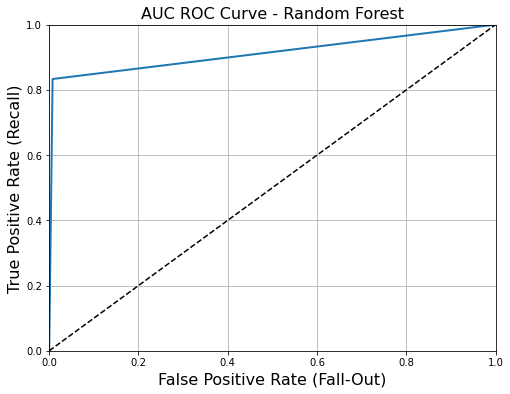

In [ ]:
plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, label="Random Forest")
plt.title("AUC ROC Curve - Random Forest", fontsize=16)
plt.show()

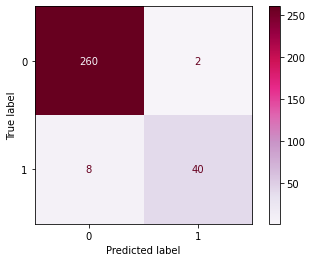

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_enc, rf_y_pred, cmap= 'PuRd')
plt.show()

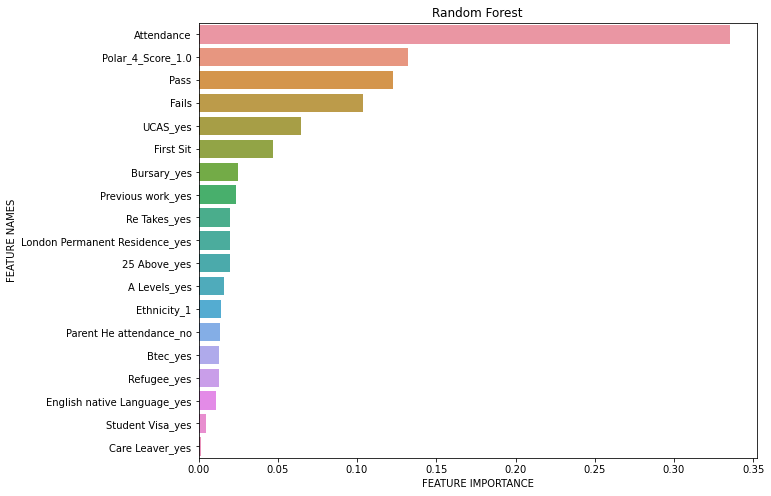

In [ ]:
rf.fit(X_train, y_train)
plot_feature_importance(rf.feature_importances_, X_train.columns, "Random Forest")

## Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboc= GradientBoostingClassifier()

gboc.fit(X_train, y_train)
gboc_y_pred= gboc.predict(x_test_num_cat[features])

#gboc_y_pred = cross_val_predict(gboc, X, y, cv=10)

In [ ]:
gboc_metrics=resume_m(y_test_enc, gboc_y_pred, "Gradient Boosting")
gboc_metrics

,Accuracy,AUC,Recall,Precision,F1
Gradient Boosting,0.970968,0.923267,0.854167,0.953488,0.901099


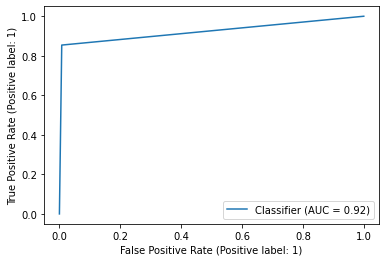

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test_enc, gboc_y_pred)

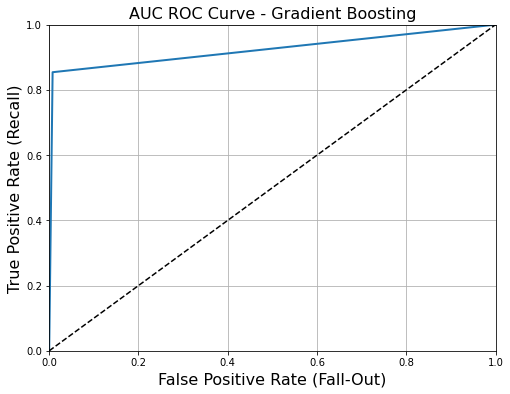

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_enc, gboc_y_pred)

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, label="Gradient Boosting")
plt.title("AUC ROC Curve - Gradient Boosting", fontsize=16)
plt.show()

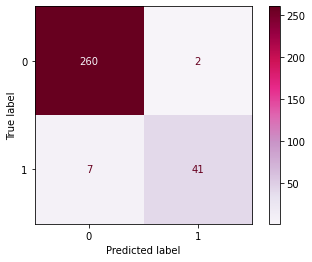

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_enc, gboc_y_pred, cmap= 'PuRd')
plt.show()

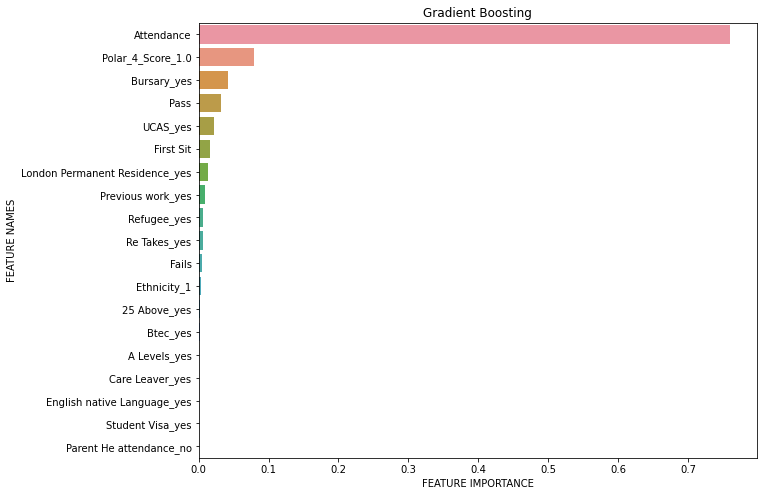

In [ ]:
gboc.fit(X_train, y_train)
plot_feature_importance(gboc.feature_importances_, X_train.columns, "Gradient Boosting")

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada= AdaBoostClassifier(random_state=42)

ada.fit(X_train, y_train)
ada_y_pred= ada.predict(x_test_num_cat[features])


#ada_y_pred= cross_val_predict(ada, X, y, cv=10)

In [ ]:
ada_metrics=resume_m(y_test_enc, ada_y_pred, "AdaBoostClassifier")
ada_metrics

,Accuracy,AUC,Recall,Precision,F1
AdaBoostClassifier,0.96129,0.900525,0.8125,0.928571,0.866667


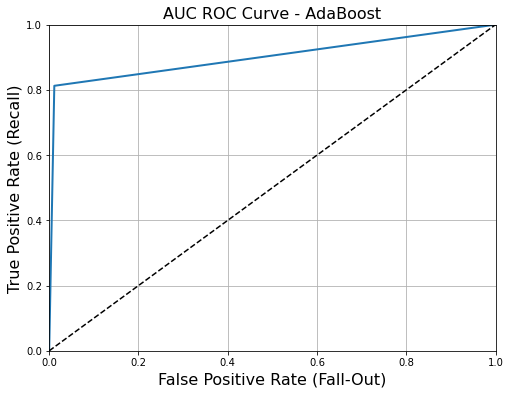

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_enc, ada_y_pred)

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr, label="AdaBoost")
plt.title("AUC ROC Curve - AdaBoost", fontsize=16)
plt.show()

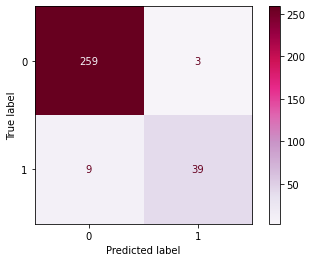

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_enc, ada_y_pred, cmap= 'PuRd')
plt.show()

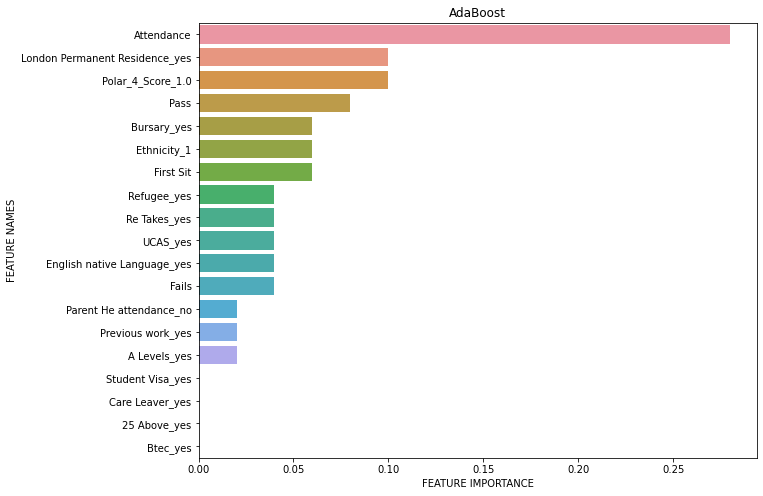

In [ ]:
ada.fit(X_train,y_train)
plot_feature_importance(ada.feature_importances_, X_train.columns, "AdaBoost")

# RESUME OF THE EXPERIMENT

In [ ]:
resum= pd.concat((ada_metrics, gboc_metrics),axis =0)
resum= pd.concat((resum, rf_metrics),axis =0)
resum

,Accuracy,AUC,Recall,Precision,F1
AdaBoostClassifier,0.961290,0.900525,0.812500,0.928571,0.866667
Gradient Boosting,0.970968,0.923267,0.854167,0.953488,0.901099
RandomForest,0.967742,0.912850,0.833333,0.952381,0.888889
